# NumPy basics

## 1. Creation

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### numpy가 만들어내는 행렬: array 안에 괄호 2개

In [3]:
np.empty([2,3], dtype='int')

array([[         0, 1072168960,          0],
       [1072168960,          0,          0]])

### np.zeros 0으로 채우기

In [4]:
np.zeros([2,3])

array([[0., 0., 0.],
       [0., 0., 0.]])

### 0은 반드시 포함, 10은 포함되지 않음

In [5]:
np.arange(0,10,2, dtype='float64')

array([0., 2., 4., 6., 8.])

### 0,10 포함, 6등분하라. 

In [6]:
np.linspace(0,10,6, dtype=float)

array([ 0.,  2.,  4.,  6.,  8., 10.])

### list를 행렬로 만들기.

In [7]:
X = np.array([[1,2,3],[4,5,6]])
X

array([[1, 2, 3],
       [4, 5, 6]])

### variable type 바꾸기

In [8]:
X.astype(np.float64)

array([[1., 2., 3.],
       [4., 5., 6.]])

In [9]:
np.zeros_like(X)

array([[0, 0, 0],
       [0, 0, 0]])

### 0이 평균, 1을 표준편차로 하는 정규분표상에서  random 숫자를 100개 뽑아라.
    plt.hist- histogram 

[ 2.18862449e+00 -3.37532966e-01  1.18051014e+00  1.72676505e+00
  1.10989065e+00  2.06155326e-01 -9.86824376e-02  1.62578014e+00
 -1.64540591e+00 -5.55455432e-01  1.00386023e+00 -1.47979361e+00
 -2.87284193e+00 -2.21313939e-01 -1.09568341e+00 -4.74645185e-01
 -1.01625052e-01 -1.81298397e-01  2.08153387e+00  3.70665046e-01
  2.46770941e-01  8.47548954e-01  1.44539924e-01 -6.15523195e-01
  4.58368602e-01  4.82239488e-01  1.28049473e+00 -8.25563301e-01
  5.33927223e-01 -5.23652915e-01  1.16544142e-01  3.68526964e-02
 -1.19440964e+00 -7.68595002e-01 -3.19301659e-01 -1.72001212e+00
 -7.34181019e-02 -4.86806857e-01 -6.29154186e-01 -9.57473112e-01
 -1.15202873e+00  1.54365966e+00  7.35820177e-01 -2.78551514e+00
 -3.16757524e-02  1.31741621e+00  3.88448830e-01 -2.04901603e+00
 -3.29105315e-01 -1.52039568e+00 -4.72068274e-01 -9.83206821e-01
  1.96398569e+00  2.32127116e-02  1.42917867e+00  6.43246742e-01
 -6.71976841e-01 -1.72696826e-01  1.03452423e+00 -1.00588742e+00
  5.63013391e-01  7.38335

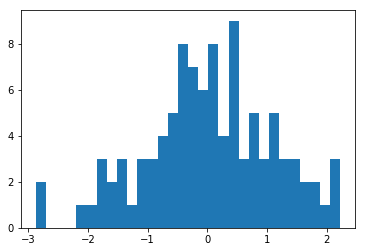

In [10]:
data = np.random.normal(0,1, 100)
print(data)
plt.hist(data, bins=30)
plt.show()

## 2. Manipulation

### 안에 들어가는 element 개수: 2*3*4

In [13]:
X = np.ones([2, 3, 4])
X

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]])

### x를 reshape하는 데는 한계가 있다: element 개수가 같아야함
    조건만 만족하면 차원을 바꿀 수도 있음. 
    -1 적으면 자동계산해줌. (나머지 다 정했을 때)

In [15]:
Y = X.reshape(-1, 3, 2)
Y

array([[[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]]])

### 똑같은지 확인

In [16]:
np.allclose(X.reshape(-1, 3, 2), Y)

True

In [17]:
assert np.allclose(X.reshape(-1, 3, 2), Y)

## 3. NumPy I/O

### random number 만들기
    a=> 0부터 10미만으로 정수를 만들어라. 
    b=> 1미만의 랜덤 숫자
    np.savez("파일이름", a,b) => 저장  

In [27]:
a = np.random.randint(0, 10, [2, 3])
b = np.random.random([2, 3])
np.savez("test", a, b)

In [24]:
!ls -al test*

'ls'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


### %who- 만들어 놓은 변수 나옴/ del a, b - 변수 중 a,b 지우기
    

In [28]:
del a, b
%who  

X	 Y	 data	 np	 plt	 


### load 하기

In [30]:
npzfiles = np.load("test.npz")
npzfiles.files

['arr_0', 'arr_1']

In [31]:
npzfiles['arr_0']

array([[2, 8, 4],
       [5, 5, 4]])

### delimiter=","-> 콤마로 나눠져있다
    skiprow=1-> 첫줄은 header니까 skip 해라.
    'formats':('f', 'f')-> float라는 뜻. i를 넣으면 integer로 나온다. 
    

In [32]:
data = np.loadtxt("regression.csv", delimiter=",", skiprows=1, dtype={'names':("X", "Y"), 'formats':('f', 'f')})
data

array([( 3, 1), ( 4, 2), ( 5, 2), ( 6, 3), ( 6, 1), ( 4, 1), ( 9, 3),
       ( 6, 2), ( 7, 2), ( 2, 1), ( 7, 2), (10, 3), ( 5, 1), ( 7, 2),
       ( 5, 2), ( 9, 2), ( 3, 1)], dtype=[('X', '<i4'), ('Y', '<i4')])

In [33]:
np.savetxt("regression_saved.csv", data, delimiter=",")
!ls -al regression_saved.csv

'ls'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


## 4. Inspecting

In [34]:
arr = np.random.random([5,2,3])

print(arr.ndim)=> 몇 차원이냐
print(arr.size)=> element 개수

In [54]:
print(type(arr))
print(len(arr))
print(arr.shape)
print(arr.ndim)
print(arr.size)
print(arr.dtype)

<class 'numpy.ndarray'>
5
(5, 2, 3)
3
30
float64


## 5. Operations

### 5.1 Arithmetic

In [39]:
a = np.arange(1, 5)
b = np.arange(9, 5,-1)
a,b

(array([1, 2, 3, 4]), array([9, 8, 7, 6]))

In [41]:
print(a - b)
print(a * b)


[-8 -6 -4 -2]
[ 9 16 21 24]


### matrix로 만들기
    [개수=차원 수

In [46]:
a = np.matrix(a)
b = np.matrix(b)
a,b

(matrix([[1, 2, 3, 4]]), matrix([[9, 8, 7, 6]]))

In [47]:
a * b.T

matrix([[70]])

In [48]:
a.T * b

matrix([[ 9,  8,  7,  6],
        [18, 16, 14, 12],
        [27, 24, 21, 18],
        [36, 32, 28, 24]])

### 5.2 Comparison

In [50]:
a = np.arange(1, 10).reshape(3,3)
b = np.arange(9, 0, -1).reshape(3,3)
print(a)
print(b)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[9 8 7]
 [6 5 4]
 [3 2 1]]


In [51]:
a == b

array([[False, False, False],
       [False,  True, False],
       [False, False, False]])

In [52]:
a > b

array([[False, False, False],
       [False, False,  True],
       [ True,  True,  True]])

### 5.3 Aggregate (sum, min, max, mean, median, std)

### sum: 둘 중의 하나 택해서 쓰면 됨

In [53]:
a.sum(), np.sum(a)

(45, 45)

In [68]:
a.sum(axis=0), np.sum(a, axis=0)

(array([12, 15, 18]), array([12, 15, 18]))

In [69]:
a.sum(axis=1), np.sum(a, axis=1)

(array([ 6, 15, 24]), array([ 6, 15, 24]))

## Broadcasting

In [54]:
a = np.arange(1, 25).reshape(4, 6)
a

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18],
       [19, 20, 21, 22, 23, 24]])

In [55]:
a + 100

array([[101, 102, 103, 104, 105, 106],
       [107, 108, 109, 110, 111, 112],
       [113, 114, 115, 116, 117, 118],
       [119, 120, 121, 122, 123, 124]])

In [56]:
b = np.arange(6)
b

array([0, 1, 2, 3, 4, 5])

In [73]:
a + b

array([[ 1,  3,  5,  7,  9, 11],
       [ 7,  9, 11, 13, 15, 17],
       [13, 15, 17, 19, 21, 23],
       [19, 21, 23, 25, 27, 29]])

In [57]:
c = np.arange(4).reshape([4,1])
c

array([[0],
       [1],
       [2],
       [3]])

In [58]:
a + c

array([[ 1,  2,  3,  4,  5,  6],
       [ 8,  9, 10, 11, 12, 13],
       [15, 16, 17, 18, 19, 20],
       [22, 23, 24, 25, 26, 27]])